In [1]:
#D:\CDAC MODULES\DataAnalytics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("D:/CDAC MODULES/DataAnalytics/salary.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
X = df[['YearsExperience']] #Needs to be a dataframe so double brackets
y = df['Salary']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=24)

In [6]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
#Make Predictions

y_pred = model.predict(X_test)
print(y_pred)

[ 62149.58192134  63113.15871241 116109.8822211   55404.54438387
  53477.39080174 117073.45901216]


In [8]:
#Asses yhe model performance

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("R-Squared: ", r2)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

R-Squared:  0.9520702017424296
Mean Absolute Error:  4705.869732754952
Mean Squared Error:  30955226.717302386
Root Mean Squared Error:  5563.742150504675


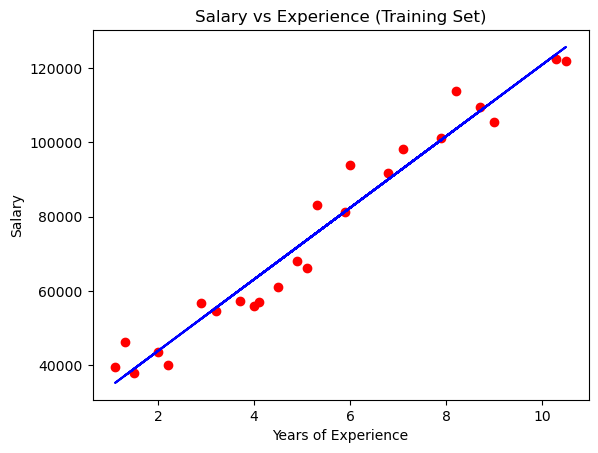

In [9]:
#Visualize training set results

plt.scatter(X_train, y_train, color='red')

#plot  regression line
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show();

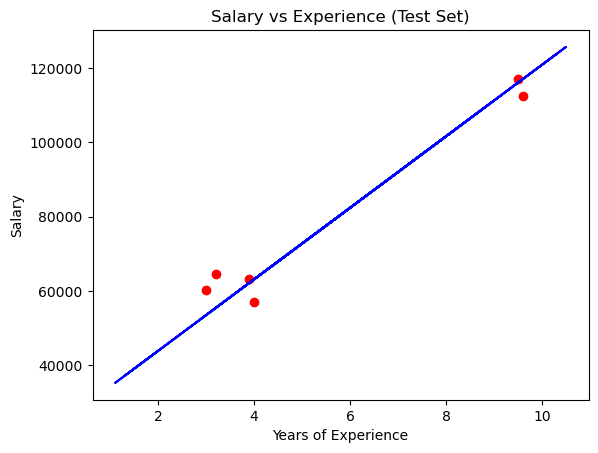

In [10]:
#VIsualize test results

plt.scatter(X_test, y_test, color='red')

#plot  regression line
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show();

In [11]:
#Make new Predictions

print("*** Making predictions for New data ***")

new_experience_years_for_predictions = [1.5,4,8,12,15,20,25]

for new_experience_years in new_experience_years_for_predictions:
    new_salary_pred = model.predict(pd.DataFrame({'YearsExperience':[new_experience_years]}))
    
    print(f"Experience in Years : {new_experience_years} .... Predicted Salary : {new_salary_pred}")


*** Making predictions for New data ***
Experience in Years : 1.5 .... Predicted Salary : [39023.73893573]
Experience in Years : 4 .... Predicted Salary : [63113.15871241]
Experience in Years : 8 .... Predicted Salary : [101656.23035509]
Experience in Years : 12 .... Predicted Salary : [140199.30199777]
Experience in Years : 15 .... Predicted Salary : [169106.60572978]
Experience in Years : 20 .... Predicted Salary : [217285.44528314]
Experience in Years : 25 .... Predicted Salary : [265464.28483649]


In [12]:
# Saving Model

import joblib

joblib.dump(model, 'final_salary_model.pkl')

print(X)
print(X.columns)
print(list(X.columns))

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
Index(['YearsExperience'], dtype='object')
['YearsExperience']


In [13]:
joblib.dump(list(X.columns), 'salary_column_names.pkl')

['salary_column_names.pkl']

In [14]:
#Loading model (Model Persistance)

col_names = joblib.load('salary_column_names.pkl')
print(col_names)

['YearsExperience']


In [15]:
loaded_model = joblib.load('final_salary_model.pkl')

In [17]:
#Make new predictions using loaded Model

#Make new Predictions

print("*** Making predictions for New data ***")

new_experience_years_for_predictions = [1.5,4,8,12,15,20,25]

for new_experience_years in new_experience_years_for_predictions:
    new_salary_pred = loaded_model.predict(pd.DataFrame({'YearsExperience':[new_experience_years]}))
    
    print(f"Experience in Years : {new_experience_years} .... Predicted Salary : {new_salary_pred}")


*** Making predictions for New data ***
Experience in Years : 1.5 .... Predicted Salary : [39023.73893573]
Experience in Years : 4 .... Predicted Salary : [63113.15871241]
Experience in Years : 8 .... Predicted Salary : [101656.23035509]
Experience in Years : 12 .... Predicted Salary : [140199.30199777]
Experience in Years : 15 .... Predicted Salary : [169106.60572978]
Experience in Years : 20 .... Predicted Salary : [217285.44528314]
Experience in Years : 25 .... Predicted Salary : [265464.28483649]
